Este notebook es para analizar los recorridos y así poder añadir información no extraible de manera automática.

In [4]:
%matplotlib notebook

import time

import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pynsia.pointcloud import PointCloud

import ipywidgets as widgets
from IPython.display import display

In [5]:
df = pd.read_csv('/media/blazaid/Saca/Phd/data/synced/miguel/validation/dataset.csv')

<IPython.core.display.Javascript object>


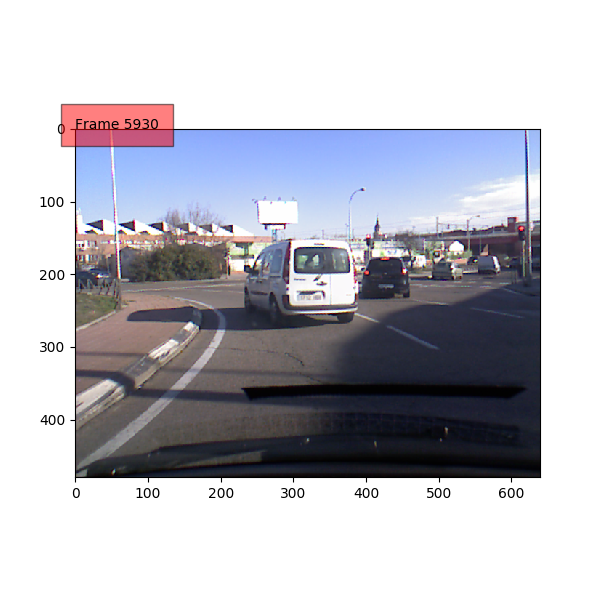

KeyboardInterrupt: 

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

from_index = 4260

to_frame = None

def plt_image(ax, index, path):
    image = mpimg.imread(path)
    ax.clear()
    ax.imshow(image)
    ax.text(0, 0, 'Frame ' + str(index), bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

for index, row in df.iterrows():
    if from_index is not None and from_index <= index:
        if not pd.isnull(row['snapshots_path']):
            plt_image(ax, index, row['snapshots_path'])
        else:
            print('Missing image in index ' + str(index))
        #time.sleep(0.5)

        fig.canvas.draw()

In [ ]:
fig, ax = plt.subplots(1, 1)

from_index = 0
to_frame = None

def plt_pointcloud(ax, path):
    pc = PointCloud.load(path)
    ax.clear()
    ax = fig.gca(projection='3d')
    ax.set_xlim((-25, 25))
    ax.set_ylim((-25, 25))
    ax.set_zlim((-25, 25))
    ax.scatter(pc.points[:,0], pc.points[:,1], pc.points[:,2], s=1);

for index, row in df.iterrows():
    if from_index is not None and from_index <= index:
        if not pd.isnull(row['pointclouds_path']):
            plt_pointcloud(ax, row['pointclouds_path'])
        else:
            print('Missing pointcloud in index ' + str(index))
        time.sleep(0.5)

    fig.canvas.draw()